#### Predicting event '3301' and '1402' 

In solving this task I have approached the problem as a purely multivariate classification problem rather than a timeseries multivariate classification. This was necesary as I haven't encountered time series multivariate classification problems or works prior to this. Also, based on my understanding of the columns, 'CODE" isn't a continous variable, rather it's a categorical variables such, a classifier is appropriate.  

import the datasets

In [1]:
import pandas as pd
df1 = pd.read_csv('dataset_2020.csv', parse_dates= {'Datetime': [5]})
df2 =  pd.read_csv('dataset_2021.csv', parse_dates= {'Datetime': [5]})
df1.dtypes

C:\Users\kawba\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Datetime         datetime64[ns]
NUMBER                   object
CODE                      int64
GENERAL_AREA             object
SPECIFIC_AREA            object
FAILING                   int64
YEAR                      int64
MONTH                     int64
DAY_OF_WEEK              object
HOUR                      int64
X                       float64
Y                       float64
(X, Y)                   object
dtype: object

check the columns type and dataset information

In [2]:
df2.dtypes

Datetime         datetime64[ns]
NUMBER                   object
CODE                      int64
GENERAL_AREA             object
SPECIFIC_AREA            object
FAILING                   int64
YEAR                      int64
MONTH                     int64
DAY_OF_WEEK              object
HOUR                      int64
X                       float64
Y                       float64
(X, Y)                   object
dtype: object

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70894 entries, 0 to 70893
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       70894 non-null  datetime64[ns]
 1   NUMBER         70894 non-null  object        
 2   CODE           70894 non-null  int64         
 3   GENERAL_AREA   70616 non-null  object        
 4   SPECIFIC_AREA  70894 non-null  object        
 5   FAILING        70894 non-null  int64         
 6   YEAR           70894 non-null  int64         
 7   MONTH          70894 non-null  int64         
 8   DAY_OF_WEEK    70894 non-null  object        
 9   HOUR           70894 non-null  int64         
 10  X              70894 non-null  float64       
 11  Y              70894 non-null  float64       
 12  (X, Y)         70894 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 7.0+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34915 entries, 0 to 34914
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       34915 non-null  datetime64[ns]
 1   NUMBER         34915 non-null  object        
 2   CODE           34915 non-null  int64         
 3   GENERAL_AREA   34029 non-null  object        
 4   SPECIFIC_AREA  34915 non-null  object        
 5   FAILING        34915 non-null  int64         
 6   YEAR           34915 non-null  int64         
 7   MONTH          34915 non-null  int64         
 8   DAY_OF_WEEK    34915 non-null  object        
 9   HOUR           34915 non-null  int64         
 10  X              34915 non-null  float64       
 11  Y              34915 non-null  float64       
 12  (X, Y)         34915 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 3.5+ MB


Merge both dataset since they are similar

In [5]:
data = pd.concat([df1, df2])
data

,Datetime,NUMBER,CODE,GENERAL_AREA,SPECIFIC_AREA,FAILING,YEAR,MONTH,DAY_OF_WEEK,HOUR,X,Y,"(X, Y)"
0,2020-02-20 00:00:00,854652314,3115,B2,289,0,2020,2,Thursday,0,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,2020-02-21 01:42:00,457856954,3115,B2,289,0,2020,2,Friday,1,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,2020-04-24 13:00:00,302030654,1106,D4,167,0,2020,4,Friday,13,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
3,2020-05-01 00:00:00,212025777,1108,A7,28,0,2020,5,Friday,0,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
4,2020-09-07 00:00:00,212025557,2670,A1,77,0,2020,9,Monday,0,42.361839,-71.059765,"(42.3618385665647, -71.0597648909416)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34910,2021-03-13 09:10:00,121016052,3831,C11,347,0,2021,3,Saturday,9,42.307289,-71.058499,"(42.3072894059195, -71.0584991240592)"
34911,2021-01-19 12:00:00,121005808,1102,B3,289,0,2021,1,Tuesday,12,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
34912,2021-01-04 00:00:00,121000816,3304,E5,675,0,2021,1,Monday,0,0.000000,0.000000,"(0, 0)"
34913,2021-04-02 10:45:00,120221042,3006,E5,680,0,2021,4,Friday,10,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)"


Time series dataset can be senstive to order, thus they should be sorted wrt the dates

In [6]:
data.sort_values(by = ['Datetime'])

,Datetime,NUMBER,CODE,GENERAL_AREA,SPECIFIC_AREA,FAILING,YEAR,MONTH,DAY_OF_WEEK,HOUR,X,Y,"(X, Y)"
10263,2020-01-01 00:00:00,202082771,2670,A7,28,0,2020,1,Wednesday,0,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
65745,2020-01-01 00:00:00,202007210,1001,C6,200,0,2020,1,Wednesday,0,42.341287,-71.054679,"(42.3412875043904, -71.054679326494)"
58642,2020-01-01 00:00:00,202017021,2647,D4,167,0,2020,1,Wednesday,0,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
25974,2020-01-01 00:00:00,202062189,3201,B3,465,0,2020,1,Wednesday,0,42.284826,-71.091374,"(42.2848257658049, -71.091373689388)"
59485,2020-01-01 00:00:00,202015883,1102,B2,282,0,2020,1,Wednesday,0,42.328663,-71.085634,"(42.3286628355561, -71.0856340118355)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,2021-07-08 01:21:00,212046487,3005,D4,167,0,2021,7,Thursday,1,42.339542,-71.069409,"(42.3395419898301, -71.0694087696754)"
24,2021-07-08 01:30:00,212046483,3006,D4,594,0,2021,7,Thursday,1,42.342439,-71.084455,"(42.3424394483042, -71.0844552992046)"
20,2021-07-08 02:32:00,212046502,520,D4,156,0,2021,7,Thursday,2,42.338414,-71.076797,"(42.3384144127128, -71.0767974124717)"
22,2021-07-08 02:47:00,212046495,3005,D4,626,0,2021,7,Thursday,2,42.341604,-71.097718,"(42.3416035655498, -71.0977175029356)"


column specific_area appears to be int but is currenntly an object. This should be changed

In [7]:
data['SPECIFIC_AREA'] = pd.to_numeric(data.SPECIFIC_AREA, errors='coerce')

Since we have two events of intrest, best to create a dataset of just these events

In [8]:
dataset1 = data.loc[(data['CODE'] == 1402) | (data['CODE'] == 3301)]
dataset1

,Datetime,NUMBER,CODE,GENERAL_AREA,SPECIFIC_AREA,FAILING,YEAR,MONTH,DAY_OF_WEEK,HOUR,X,Y,"(X, Y)"
30,2020-10-05 00:00:00,212021101,1402,C11,355.0,0,2020,10,Monday,0,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)"
120,2020-10-26 13:45:00,202079121,1402,E5,664.0,1,2020,10,Monday,13,42.292673,-71.123293,"(42.2926731782789, -71.1232931129253)"
136,2020-12-20 00:00:00,212009193,1402,B2,181.0,0,2020,12,Sunday,0,42.325877,-71.070249,"(42.3258765848214, -71.0702494665461)"
165,2020-09-28 17:45:00,202071175,1402,A7,28.0,0,2020,9,Monday,17,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
185,2020-12-31 10:00:00,212006647,1402,B3,463.0,0,2020,12,Thursday,10,42.297105,-71.088077,"(42.2971045178923, -71.0880773111089)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34798,2021-01-01 03:25:00,212000044,1402,A7,NaN,0,2021,1,Friday,3,42.376578,-71.029939,"(42.3765779890333, -71.0299390356099)"
34847,2021-06-16 23:29:00,210270417,1402,B3,464.0,0,2021,6,Wednesday,23,0.000000,0.000000,"(0, 0)"
34881,2021-02-12 20:23:00,210062731,1402,A1,66.0,0,2021,2,Friday,20,42.360634,-71.070052,"(42.360633857127, -71.0700524705507)"
34888,2021-01-26 16:28:00,210037178,1402,E18,940.0,0,2021,1,Tuesday,16,42.243840,-71.121601,"(42.2438395882449, -71.1216012399908)"


Check for missing column

In [9]:
dataset1.isnull().sum()

Datetime           0
NUMBER             0
CODE               0
GENERAL_AREA      75
SPECIFIC_AREA    705
FAILING            0
YEAR               0
MONTH              0
DAY_OF_WEEK        0
HOUR               0
X                  0
Y                  0
(X, Y)             0
dtype: int64

We'll drop the missing rows. This is better than inputation since the variables are mostly categorical 

In [10]:
dataset1.dropna(inplace= True)
dataset1

<ipython-input-10-10a41bcf4efa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1.dropna(inplace= True)


,Datetime,NUMBER,CODE,GENERAL_AREA,SPECIFIC_AREA,FAILING,YEAR,MONTH,DAY_OF_WEEK,HOUR,X,Y,"(X, Y)"
30,2020-10-05 00:00:00,212021101,1402,C11,355.0,0,2020,10,Monday,0,42.297555,-71.059709,"(42.2975553295965, -71.0597091024257)"
120,2020-10-26 13:45:00,202079121,1402,E5,664.0,1,2020,10,Monday,13,42.292673,-71.123293,"(42.2926731782789, -71.1232931129253)"
136,2020-12-20 00:00:00,212009193,1402,B2,181.0,0,2020,12,Sunday,0,42.325877,-71.070249,"(42.3258765848214, -71.0702494665461)"
165,2020-09-28 17:45:00,202071175,1402,A7,28.0,0,2020,9,Monday,17,42.370818,-71.039291,"(42.3708180467024, -71.0392907813515)"
185,2020-12-31 10:00:00,212006647,1402,B3,463.0,0,2020,12,Thursday,10,42.297105,-71.088077,"(42.2971045178923, -71.0880773111089)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34793,2021-01-01 05:04:00,212000051,3301,C11,370.0,0,2021,1,Friday,5,42.295072,-71.047497,"(42.2950716588055, -71.0474970887394)"
34847,2021-06-16 23:29:00,210270417,1402,B3,464.0,0,2021,6,Wednesday,23,0.000000,0.000000,"(0, 0)"
34881,2021-02-12 20:23:00,210062731,1402,A1,66.0,0,2021,2,Friday,20,42.360634,-71.070052,"(42.360633857127, -71.0700524705507)"
34888,2021-01-26 16:28:00,210037178,1402,E18,940.0,0,2021,1,Tuesday,16,42.243840,-71.121601,"(42.2438395882449, -71.1216012399908)"


Column number will be dropped as it seems like an identifier or id sort of. X and Y will be dropped coz they are coorrdinates(they may be used later to see if they improve the model but let's remove them for now). column x,y will also before removed; it most definitely correlates with x and y

In [11]:
new_data = dataset1.drop(['NUMBER', 'X', 'Y', '(X, Y)', 'YEAR', 'HOUR'], axis = 1)

In [12]:
new_data.dtypes

Datetime         datetime64[ns]
CODE                      int64
GENERAL_AREA             object
SPECIFIC_AREA           float64
FAILING                   int64
MONTH                     int64
DAY_OF_WEEK              object
dtype: object

In [13]:
#creating the y variables
input_df = new_data.drop(['CODE'], axis = 1)

In [14]:
#let's change the input categorical variables to dummies
dataset_X = pd.get_dummies(input_df)

In [15]:
dataset_X.columns

Index(['Datetime', 'SPECIFIC_AREA', 'FAILING', 'MONTH', 'GENERAL_AREA_A1',
       'GENERAL_AREA_A15', 'GENERAL_AREA_A7', 'GENERAL_AREA_B2',
       'GENERAL_AREA_B3', 'GENERAL_AREA_C11', 'GENERAL_AREA_C6',
       'GENERAL_AREA_D14', 'GENERAL_AREA_D4', 'GENERAL_AREA_E13',
       'GENERAL_AREA_E18', 'GENERAL_AREA_E5', 'GENERAL_AREA_External',
       'DAY_OF_WEEK_Friday', 'DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Saturday',
       'DAY_OF_WEEK_Sunday', 'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Tuesday',
       'DAY_OF_WEEK_Wednesday'],
      dtype='object')

In [16]:
#this reshaping is necesary to scale the data
scale_input = dataset_X['SPECIFIC_AREA'].values.reshape(-1,1)

we'll scale specific area as the values are very large relative to the dummies in other columns

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_input = scaler.fit_transform(scale_input)
scaled_input = pd.DataFrame(scaled_input, columns=['SPECIFIC_AREA'])

In [18]:
 dataset_X.drop(['SPECIFIC_AREA'], axis = 1, inplace =  True)

let's merge the scaled specific area and the other input variables, 
but first we need to reset the index to avoid multiple indexing error

In [19]:
dataset_X.reset_index(inplace=True, drop=True)

dataset_X

,Datetime,FAILING,MONTH,GENERAL_AREA_A1,GENERAL_AREA_A15,GENERAL_AREA_A7,GENERAL_AREA_B2,GENERAL_AREA_B3,GENERAL_AREA_C11,GENERAL_AREA_C6,...,GENERAL_AREA_E18,GENERAL_AREA_E5,GENERAL_AREA_External,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,2020-10-05 00:00:00,0,10,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2020-10-26 13:45:00,1,10,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2020-12-20 00:00:00,0,12,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2020-09-28 17:45:00,0,9,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2020-12-31 10:00:00,0,12,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,2021-01-01 05:04:00,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6464,2021-06-16 23:29:00,0,6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6465,2021-02-12 20:23:00,0,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6466,2021-01-26 16:28:00,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Now we can merge

In [20]:
final_input = pd.concat([scaled_input, dataset_X], axis=1)

Now we drop the date column since we have a classsification problem

In [21]:
final_input.drop(['Datetime'], axis = 1, inplace = True)

In [22]:
#getting  the target variable
dataset_y = dataset1['CODE']

we need to split the data(for training and testing) but sklearn split library cannot be used due to it's randomness and a time series data is affected by order

In [23]:
#this gives the index at which to split the data
# here we use a 20:80 split
0.8 *len(final_input)

5174.400000000001

In [24]:
#Splittingg the data to train and test 
train_x = final_input.iloc[:5174]
test_x = final_input.iloc[5174:]
train_y = dataset_y.iloc[:5174]
test_y = dataset_y.iloc[5174:]

###### Modelling

In [25]:
#Modelling. 
#import the classifier and fit on the train data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_x, train_y)

DecisionTreeClassifier()

In [26]:
#Check the accuracy on train data
model.score(train_x, train_y)

0.9710088906068806

In [27]:
#accuracy on tetst data
model.score(test_x, test_y)

0.6221020092735703

In [28]:
#now we predict 
pred = model.predict(test_x)

In [29]:
#checkng other acuracy metric
from sklearn.metrics import classification_report
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

        1402       0.69      0.75      0.72       837
        3301       0.46      0.38      0.42       457

    accuracy                           0.62      1294
   macro avg       0.57      0.57      0.57      1294
weighted avg       0.61      0.62      0.61      1294



In [30]:
#checking the confusion metric
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y,pred))

[[631 206]
 [283 174]]


Looking at the model scores, the classifier performs well on the training data but a bit less on the test data. DTC are typically known to overfit the train model. Also, looking at the confusion matrix, the model performs better on 1402 than 3301. 

Let's see if the performance is particularly affected by the large numbe of variables

In [31]:
#dropping the dummy variables
#actually it's not neccesary to create new y variables but let's do that to avoid confusion
trial2 = dataset1[['SPECIFIC_AREA', 'FAILING' ]]
train2_x = trial2.iloc[:5174]
test2_x = trial2.iloc[5174:]
train2_y = dataset_y.iloc[:5174]
test2_y = dataset_y.iloc[5174:]

In [32]:
model2 = DecisionTreeClassifier()
model2.fit(train2_x, train2_y)

DecisionTreeClassifier()

In [33]:
model2.score(train2_x, train2_y)

0.7543486664089679

In [34]:
model2.score(test2_x, test2_y)

0.6530139103554868

In [35]:
pred2 = model2.predict(test2_x)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(test2_y,pred2))

              precision    recall  f1-score   support

        1402       0.68      0.86      0.76       837
        3301       0.52      0.27      0.36       457

    accuracy                           0.65      1294
   macro avg       0.60      0.57      0.56      1294
weighted avg       0.63      0.65      0.62      1294



In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test2_y,pred2))

[[720 117]
 [332 125]]


The model gives a better score on the test data than when the dummy variables are removed. However the model performs worse in predicting event 3301 and it's score on the train data is lower than previously obtained. 

Since the goal is prediction a trade off on test accuracy would be appropriate. 

Yet, let's look at the distribution to understand why both models work better in predicting event 1402

In [38]:
dataset1['CODE'].value_counts()

1402    4359
3301    2109
Name: CODE, dtype: int64

The dataset had twice as much 1402 event than 2109. This explains why both  models perform better on event 1402. It might be helpful to increase the number of event 3301. This may help skew the prediction less towards 1402 and consequently increase event 3301's true positive

In [39]:
y_test2 = pd.Series(test2_y)
y_test2 =y_test2.to_numpy(dtype ='int64')

In [40]:
table = pd.DataFrame (y_test2, columns= ['ACTUAL CODE'])
table['Predicted_CODE'] =pred2
table

,ACTUAL CODE,Predicted_CODE
0,1402,1402
1,3301,1402
2,3301,3301
3,1402,1402
4,1402,1402
...,...,...
1289,3301,3301
1290,1402,3301
1291,1402,1402
1292,1402,1402


The table above shows the predicted event versus the predicted code. 

To improve the performance of this model, several approaches can be adopted

- the parameters of the model can be tuned to find the optimal ones
- the co-ordinates can be used in the input variables.
- other classification models can also be used to compare performance

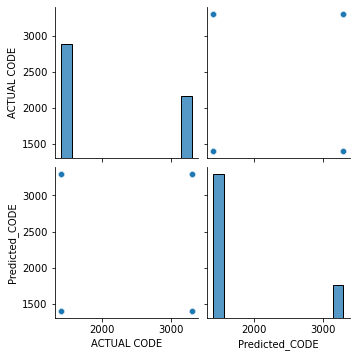

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(table)